## Mode Creation & Evaluation

The goal of this notebook is to implement a KMeans clustering agorithm on our song dataset. We have aready prepared this dataset as well as reduced the dimensions so all that is needed is to build the machine learning model. In order to build the best model we need to evaluate the best number of clusters using a number of different techniques. 

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('../data/processed/train_pca.csv')
df.head()

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0  0.830215  0.466986 -0.683765  0.457127 -0.048251 -0.022484  0.024267   
1  0.155867  0.483997  0.559965  1.050504  0.018414 -0.094124 -0.023480   
2  0.160868  0.465783 -0.181370  0.570267  0.124924 -0.460531  0.369899   
3  0.186559  0.501486 -0.243100  0.580622  0.093659 -0.325189  0.242636   
4  0.163182  0.496778 -0.101920  0.664929  0.078647 -0.305094  0.230673   

      pca_8     pca_9    pca_10    pca_11    pca_12    pca_13    pca_14  \
0 -0.024945 -0.047609 -0.038990  0.232742 -0.402358 -0.016166  0.178969   
1  0.027228 -0.155727 -0.096078  0.214693 -0.416140  0.054423 -0.190287   
2  0.879250  0.308158 -0.471682  0.130232 -0.271683  0.261533  0.244171   
3  0.481116 -0.166719  0.356101  0.948744  0.236005 -0.070773 -0.224190   
4  0.457127 -0.183040  0.351317  0.970367  0.244868 -0.008143 -0.209713   

     pca_15    pca_16    pca_17  
0  0.169989 -0.287988 -0.012622  
1  0.032858  0.015878 -0.167086  
2  0.033664 -0.088328  0.044048  
3  0.024853 -0.060442  0.182475  
4 -0.016018 -0.052503  0.008316

### KMeans Clustering

To begin we will build a K-Means clustering model, but in order to select the optimal number of clusters we must use the elbow method. This is a well known method that is used to choose the optimal number of clusters in K-Means clustering by plotting the number of clusters by the total inertia of said clusters. 

In [3]:
#we will test out multiple clustering models here
inertias = []
silh_scores = []
for num_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    labels = kmeans.fit_predict(df)
    silh_scores.append(silhouette_score(df, labels))
    inertias.append(kmeans.inertia_)

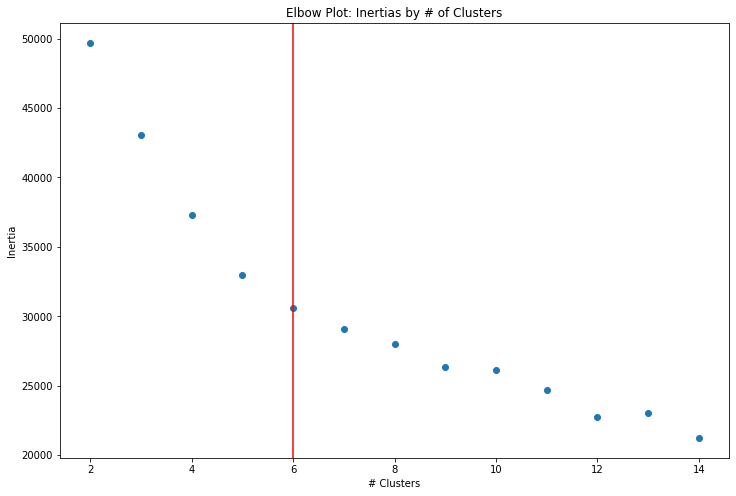

In [4]:
#plot inertia by number of clusters
plt.figure(figsize=(12, 8))
plt.plot(range(2, 15), inertias, 'o')
plt.axvline(6, color='red')
plt.title('Elbow Plot: Inertias by # of Clusters')
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.show()

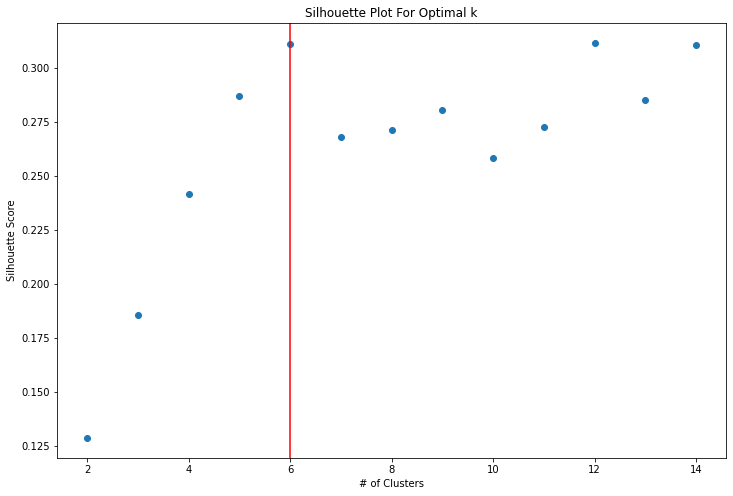

In [5]:
#plot silhouette averages by number of clusters
plt.figure(figsize=(12, 8))
plt.plot(range(2, 15), silh_scores, 'o')
plt.axvline(6, color='red')
plt.title('Silhouette Plot For Optimal k')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Now that we know how many clusters to use, let us build a KMeans clustering agorithm with our optimal number of clusters and visualize our resuts. 

In [6]:
#build our kmeans algorithm with optimal clusters
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10).fit(df)

In [7]:
#lets include our clusters in our original dataset for visualization
df['cluster'] = kmeans.labels_

<Axes: xlabel='pca_1', ylabel='pca_2'>

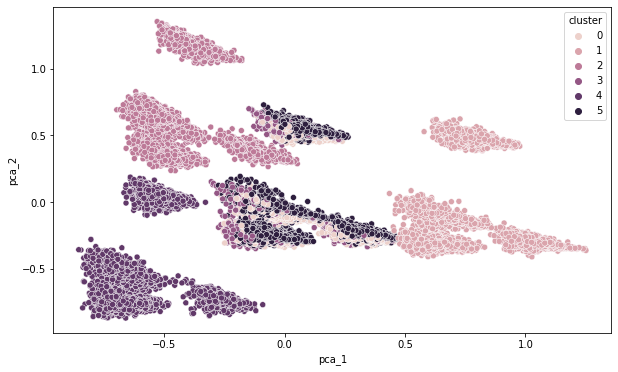

In [8]:
#lets visualize our clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster')

<Axes: xlabel='pca_2', ylabel='pca_3'>

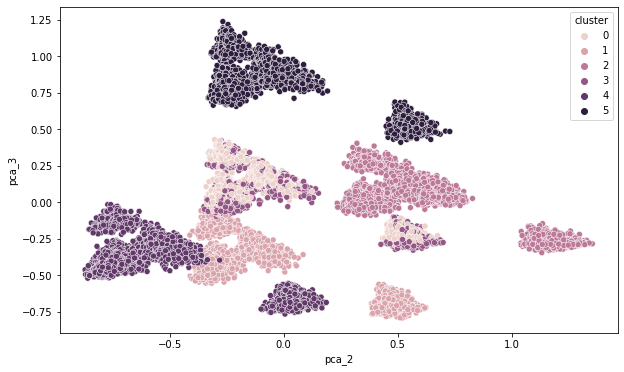

In [9]:
#lets visualize our clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_2', y='pca_3', hue='cluster')

<Axes: xlabel='pca_3', ylabel='pca_4'>

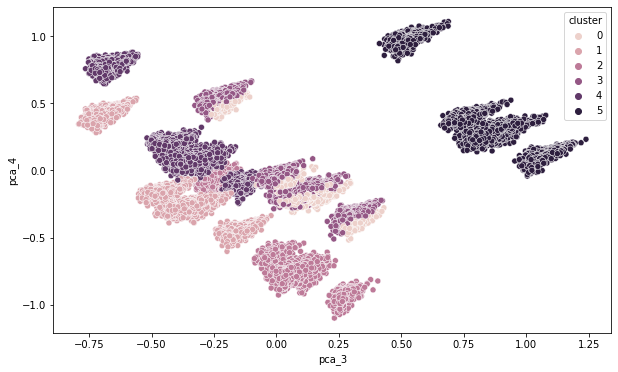

In [10]:
#lets visualize our clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_3', y='pca_4', hue='cluster')

<Axes: xlabel='pca_4', ylabel='pca_5'>

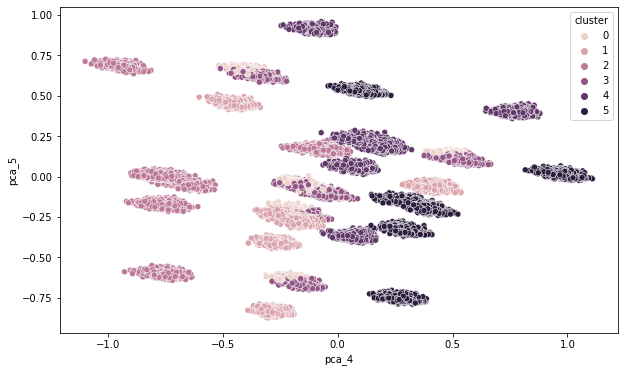

In [11]:
#lets visualize our clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_4', y='pca_5', hue='cluster')

### New Sample Prediction

Now that we have a trained KMeans Clustering algorithm, lets see how this model clusters unseen data. In the previous notebooks we have already transformed our unseen recommendation data into principal components. All that we need to do is read in our new data and use our algorithm to predict its clusters. 

In [13]:
#read in our recommend data
recommend = pd.read_csv('../data/processed/recommend_pca.csv')
recommend.head()

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
0 -0.164131 -0.285247  0.704735  0.405478 -0.172413  0.756744 -0.538565   
1 -0.118652 -0.030459  0.098147 -0.123017 -0.061361  0.006546  0.015897   
2 -0.512700  0.001830 -0.680273  0.792561  0.395622 -0.204578  0.091214   
3  0.889798  0.427527 -0.679462  0.463903 -0.081819 -0.013253  0.017245   
4  0.071390  0.538374 -0.226774  0.563966  0.105497 -0.302039  0.236152   

      pca_8     pca_9    pca_10    pca_11    pca_12    pca_13    pca_14  \
0  0.239088 -0.137000 -0.113361 -0.061155  0.066837 -0.104998 -0.061025   
1  0.126342  0.974097  1.023639 -0.152624 -0.213244  0.315597  0.433342   
2 -0.158287 -0.102121 -0.051755  0.002055 -0.052723  0.088280 -0.060369   
3 -0.014042 -0.059960  0.001507  0.162152 -0.328548  0.141904 -0.128025   
4  0.445613 -0.112568  0.377913  0.861710  0.449933 -0.203013 -0.264979   

     pca_15    pca_16    pca_17  
0 -0.005881  0.008335 -0.037258  
1 -0.103393 -0.172474  0.073788  
2  0.000409  0.162637 -0.060468  
3 -0.007947  0.088339  0.021053  
4  0.021179 -0.091954 -0.243585

In [14]:
#use our kmeans algorithm to predict our dataset
recommend_labels = kmeans.predict(recommend)

In [15]:
#read in raw recommend data
rec_df = pd.read_csv('../data/raw/recommend.csv')

In [18]:
#lets include our cluster labels
rec_df['cluster'] = recommend_labels
rec_df

Unnamed: 0               artist_name            track_name  release_date  \
0       76885                  godsmack                immune          1998   
1       65394              dennis brown         second chance          1993   
2       10980          the black crowes           sister luck          1990   
3         842           jerry lee lewis   your cheating heart          1960   
4        2764                 paul anka              eso beso          1966   
5       54425              noro morales              silencio          1952   
6       77225  rage against the machine      pistol grip pump          2000   
7       42962                     taste       railway and gun          1970   
8       28825              randy travis  messin' with my mind          1986   
9       16881                  paramore           playing god          2009   

     genre                                             lyrics  len    dating  \
0     rock  come world society futher place home land deat...   74  0.000907   
1   reggae  maybe maybe treat good feel second best girl s...   43  0.001224   
2      pop  worry sick eye hurt rest head life outside gir...   54  0.001120   
3      pop  cheat heart weep sleep sleep come night cheat ...   25  0.204740   
4      pop  beso kiss beso kiss know samba bossanova close...   97  0.001170   
5     jazz  fear dark fear thunder fear silence spirit dea...   57  0.001462   
6     rock  pistolgrip pump time pistolgrip pump time pist...  152  0.000675   
7    blues  railway leave time choose tell tell lose throw...   37  0.051874   
8  country  say thing care hang long ahead leave start mes...   41  0.001504   
9      pop  decisions precision maybe want change simply a...   91  0.000711   

   violence  world/life  ...     music  movement/places  \
0  0.348191    0.375448  ...  0.019389         0.000907   
1  0.029943    0.001224  ...  0.001224         0.001224   
2  0.482490    0.001120  ...  0.001120         0.001120   
3  0.002506    0.002506  ...  0.002506         0.002506   
4  0.001170    0.001170  ...  0.001170         0.001170   
5  0.487965    0.140561  ...  0.001462         0.001462   
6  0.000675    0.134044  ...  0.000675         0.000675   
7  0.001645    0.001645  ...  0.001645         0.001645   
8  0.001504    0.132148  ...  0.001504         0.001504   
9  0.543658    0.114697  ...  0.000711         0.000711   

   light/visual perceptions  family/spiritual  like/girls   sadness  feelings  \
0                  0.000907          0.000907    0.000907  0.000907  0.018854   
1                  0.001224          0.001224    0.056842  0.001224  0.062092   
2                  0.078222          0.001120    0.051132  0.031571  0.202862   
3                  0.002506          0.002506    0.002506  0.474607  0.002506   
4                  0.314626          0.001170    0.053731  0.001170  0.001170   
5                  0.001462          0.077630    0.001462  0.001462  0.034645   
6                  0.000675          0.024217    0.000675  0.000675  0.000675   
7                  0.001645          0.001645    0.001645  0.314594  0.001645   
8                  0.001504          0.001504    0.001504  0.001504  0.001504   
9                  0.000711          0.000711    0.000711  0.118886  0.015028   

        topic       age  cluster  
0  world/life  0.314286        5  
1  night/time  0.385714        3  
2    violence  0.428571        4  
3     sadness  0.857143        1  
4    romantic  0.771429        3  
5    violence  0.971429        4  
6     obscene  0.285714        2  
7     sadness  0.714286        1  
8  night/time  0.485714        3  
9    violence  0.157143        4  

[10 rows x 26 columns]

### Conclusion

Here we have created our KMeans clustering algorithm using optimal number of clusters. With this algorithm we have clustered music data into 6 different clusters of similar music type. 